**Задание №1**
<br>
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [35]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    boston = load_boston()

In [36]:
data = boston.data

In [37]:
target = boston.target

In [38]:
feature_names = boston.feature_names

In [39]:
X = pd.DataFrame(data, columns=feature_names)

In [40]:
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
X.shape

(506, 13)

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [43]:
y = pd.DataFrame(target, columns=['price'])

In [44]:
y.head(5)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [49]:
from sklearn.manifold import TSNE

In [50]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [51]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [52]:
X_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

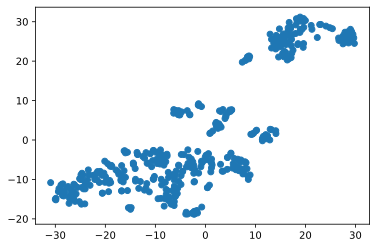

In [53]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

**Задание №2**
<br>
 С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [56]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [57]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(0, 25, 'Кластер 2')

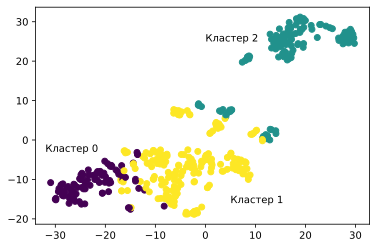

In [58]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-32, -3, 'Кластер 0')
plt.text(5, -16, 'Кластер 1')
plt.text(0, 25, 'Кластер 2')

In [60]:
print('Среднее значение цены в кластере 0:', y_train.loc[labels_train == 0, 'price'].mean())
print('Среднее значение цены в кластере 1:', y_train.loc[labels_train == 1, 'price'].mean())
print('Среднее значение цены в кластере 2:', y_train.loc[labels_train == 2, 'price'].mean())

print('Среднее значение признака "CRIM" в кластере 0:', X_train.loc[labels_train == 0, 'CRIM'].mean())
print('Среднее значение признака "CRIM" в кластере 1:', X_train.loc[labels_train == 1, 'CRIM'].mean())
print('Среднее значение признака "CRIM" в кластере 2:', X_train.loc[labels_train == 2, 'CRIM'].mean())

Среднее значение цены в кластере 0: 27.788372093023252
Среднее значение цены в кластере 1: 16.165354330708666
Среднее значение цены в кластере 2: 24.958115183246072
Среднее значение признака "CRIM" в кластере 0: 0.07356558139534886
Среднее значение признака "CRIM" в кластере 1: 10.797028425196853
Среднее значение признака "CRIM" в кластере 2: 0.42166020942408367


**Задание №3**
<br>
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [62]:
labels_test = kmeans.predict(X_test_scaled)

In [63]:
pd.value_counts(labels_test)

1    53
2    35
0    14
dtype: int64

In [64]:
print('Среднее значение цены в кластере 0:', y_test.loc[labels_test == 0, 'price'].mean())
print('Среднее значение цены в кластере 1:', y_test.loc[labels_test == 1, 'price'].mean())
print('Среднее значение цены в кластере 2:', y_test.loc[labels_test == 2, 'price'].mean())

print('Среднее значение признака "CRIM" в кластере 0:', X_test.loc[labels_test == 0, 'CRIM'].mean())
print('Среднее значение признака "CRIM" в кластере 1:', X_test.loc[labels_test == 1, 'CRIM'].mean())
print('Среднее значение признака "CRIM" в кластере 2:', X_test.loc[labels_test == 2, 'CRIM'].mean())

Среднее значение цены в кластере 0: 33.871428571428574
Среднее значение цены в кластере 1: 21.552830188679245
Среднее значение цены в кластере 2: 16.437142857142856
Среднее значение признака "CRIM" в кластере 0: 0.08618571428571427
Среднее значение признака "CRIM" в кластере 1: 0.25200716981132076
Среднее значение признака "CRIM" в кластере 2: 10.165531142857143
